In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [2]:
df = pd.read_csv('df.csv')

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


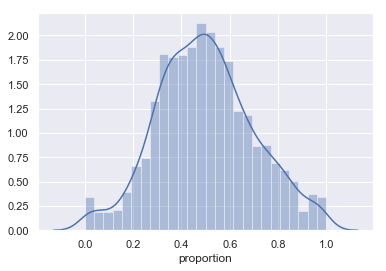

In [3]:
sns.distplot(df['proportion'])

In [4]:
features = df.loc[:, 'budget':'Western']

In [5]:
target = df.loc[:,'proportion']

In [6]:
X_train1, X_test, y_train1, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train1, test_size=0.25, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.4516091213220448

In [7]:
poly2 = PolynomialFeatures(2)

lm_poly2 = LinearRegression()
lm_poly2.fit(poly2.fit_transform(X_train), y_train)
lm_poly2.score(poly2.fit_transform(X_train), y_train)

0.8340488518918563

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


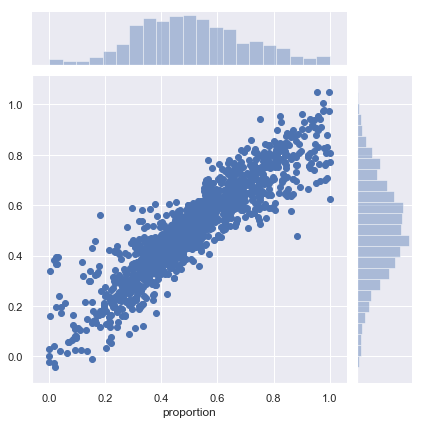

In [8]:
y_pred = lm_poly2.predict(poly2.transform(X_train))
sns.jointplot(y_train, y_pred)

In [9]:
RMSE(lm_poly2.predict(poly2.fit_transform(X_train)),y_train)

0.08140534314188383

In [10]:
lm_poly2.score(poly2.fit_transform(X_val), y_val)

-3.510597867698945e+24

In [11]:
poly3 = PolynomialFeatures(3)

lm_poly3 = LinearRegression()
lm_poly3.fit(poly3.fit_transform(X_train), y_train)
lm_poly3.score(poly3.fit_transform(X_train), y_train)

1.0

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


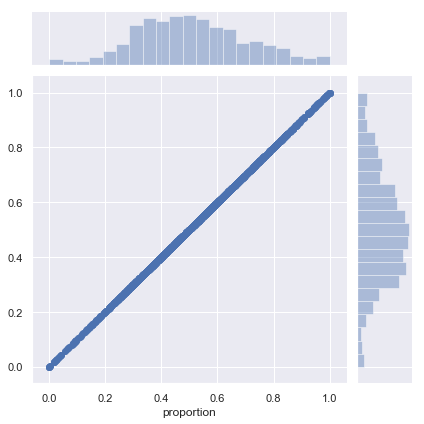

In [12]:
y_pred = lm_poly3.predict(poly3.transform(X_train))
sns.jointplot(y_train, y_pred)

In [13]:
RMSE(lm_poly3.predict(poly3.fit_transform(X_train)),y_train)

7.62741843287596e-13

In [14]:
lm_poly3.score(poly3.fit_transform(X_val), y_val)

-61.817734546995354

In [15]:
r = RidgeCV()
r.fit(poly3.fit_transform(X_train),y_train)
r.score(poly3.fit_transform(X_train),y_train)

0.9816452046642901

In [16]:
r.score(poly3.fit_transform(X_val), y_val)

-4.871549215551582

In [17]:
l = LassoCV()
l.fit(poly3.fit_transform(X_train),y_train)
l.score(poly3.fit_transform(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desc

0.6829329887800814

In [18]:
l.score(poly3.fit_transform(X_val), y_val)

0.18418914594832703

In [19]:
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], axis=0)
y_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)], axis=0)
X_train.shape

(1935, 66)

In [20]:
r.score(poly3.fit_transform(X_train),y_train)

-0.44732879643425383

In [21]:
l.score(poly3.fit_transform(X_train),y_train)

0.5617518301894989